In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#reading recently completed eda file as loan df
loan_df = pd.read_csv('C:\\Users\\Daniel-Panovest\\Downloads\\python ultra\\files\data\\vehicle_loans_eda.csv', index_col='UNIQUEID')

In [3]:
#inspecting loan df
loan_df.head()

,DISBURSED_AMOUNT,ASSET_COST,LTV,MANUFACTURER_ID,EMPLOYMENT_TYPE,STATE_ID,AADHAR_FLAG,PAN_FLAG,VOTERID_FLAG,DRIVING_FLAG,...,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT,AGE,DISBURSAL_MONTH,CREDIT_HISTORY_LENGTH_MONTHS,AVERAGE_ACCT_AGE_MONTHS
UNIQUEID,,,,,,,,,,,,,,,,,,,,,
420825,50578,58400,89.55,45,Salaried,6,1,0,0,0,...,0,0,0yrs 0mon,0yrs 0mon,0,0,34,3,0,0
537409,47145,65550,73.23,45,Self employed,6,1,0,0,0,...,0,1,1yrs 11mon,1yrs 11mon,0,1,33,9,23,23
417566,53278,61360,89.63,45,Self employed,6,1,0,0,0,...,0,0,0yrs 0mon,0yrs 0mon,0,0,32,1,0,0
624493,57513,66113,88.48,45,Self employed,6,1,0,0,0,...,0,0,0yrs 8mon,1yrs 3mon,1,1,24,10,15,8
539055,52378,60300,88.39,45,Self employed,6,1,0,0,0,...,0,0,0yrs 0mon,0yrs 0mon,1,1,41,9,0,0


In [4]:
#recreating function to explore continous variables under disbursed amount column

def eda_con(*col_name):
    for col in col_name:
        print(f'summary statistics of {col}')
        print(loan_df[col].describe())
        print("\n")

        print(f'boxplot to visualize summary statistics of {col}')
        sns.boxplot(x=col, data=loan_df);
        plt.show()
        print("\n")

        print(f'displot to further visualize frequency of {col}')
        sns.distplot(loan_df[col], hist=False);
        plt.show()
        print("\n")

        print(f'summary statistics of grouping {col} by the target variable')
        print(loan_df.groupby("LOAN_DEFAULT")[col].describe())
        print("\n")

        print(f'boxplot to visualize summary stats of {col} grouped by the target variable')
        sns.boxplot(x=col, y="LOAN_DEFAULT", data=loan_df, orient="h");
        plt.show()
        print("\n")

summary statistics of DISBURSED_AMOUNT
count    233154.000000
mean      54356.993528
std       12971.314171
min       13320.000000
25%       47145.000000
50%       53803.000000
75%       60413.000000
max      990572.000000
Name: DISBURSED_AMOUNT, dtype: float64


boxplot to visualize summary statistics of DISBURSED_AMOUNT


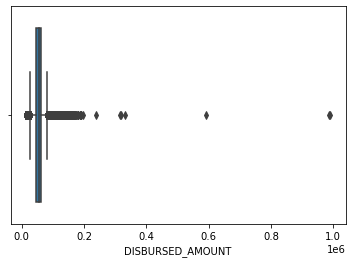



displot to further visualize frequency of DISBURSED_AMOUNT


c:\Users\Daniel-Panovest\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


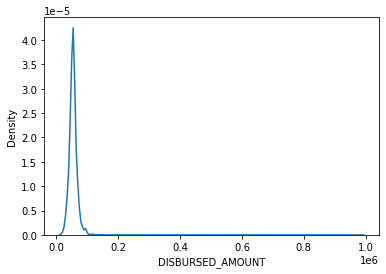



summary statistics of grouping DISBURSED_AMOUNT by the target variable
                 count          mean           std      min      25%      50%  \
LOAN_DEFAULT                                                                    
0             182543.0  53826.471111  13140.699007  13320.0  46369.0  53303.0   
1              50611.0  56270.473869  12150.255527  13369.0  49303.0  55459.0   

                  75%       max  
LOAN_DEFAULT                     
0             59947.0  990572.0  
1             61947.0  191392.0  


boxplot to visualize summary stats of DISBURSED_AMOUNT grouped by the target variable


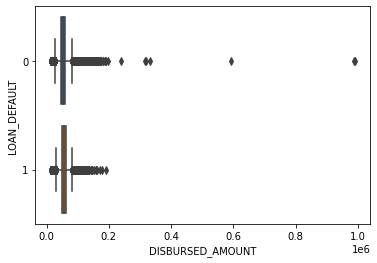

In [5]:
eda_con('DISBURSED_AMOUNT')

In [6]:
#using loc to return all the values on the row with the max disbursed amount to examine outliers observed
loan_df.loc[loan_df.DISBURSED_AMOUNT.idxmax()]

DISBURSED_AMOUNT                                                                  990572
ASSET_COST                                                                       1628992
LTV                                                                                61.39
MANUFACTURER_ID                                                                      152
EMPLOYMENT_TYPE                                                                  Missing
STATE_ID                                                                               9
AADHAR_FLAG                                                                            1
PAN_FLAG                                                                               1
VOTERID_FLAG                                                                           0
DRIVING_FLAG                                                                           0
PASSPORT_FLAG                                                                          0
PERFORM_CNS_SCORE    

In [7]:
#the output shows a person might have indeed had to borrow 990,572 to pay a loan for an asset worth 1,628,992. 
#we however should bin the disbursed amounts without skewering our data. turning the continuous variables into categorical values to reduce the impact of large outliers

#creating amount ranges and labels for disbursed amount
amount_buckets = [13000, 30000, 45000, 60000, 75000, 150000, 1000000]
amount_labels = ['13k - 30k', '30k-45k', '45k-60k', '60k-75k', '75k-150k', '150k-1m']

In [8]:
#using cut to create/assign new buckets for disbursed amounts
loan_df['DISBURSED_CAT'] = pd.cut(x=loan_df.DISBURSED_AMOUNT, bins=amount_buckets, labels=amount_labels)

UNIQUEID
420825     45k-60k
537409     45k-60k
417566     45k-60k
624493     45k-60k
539055     45k-60k
            ...   
626432     60k-75k
606141     60k-75k
613658     30k-45k
548084     30k-45k
630213    75k-150k
Name: DISBURSED_CAT, Length: 233154, dtype: category
Categories (6, object): ['13k - 30k' < '30k-45k' < '45k-60k' < '60k-75k' < '75k-150k' < '150k-1m']


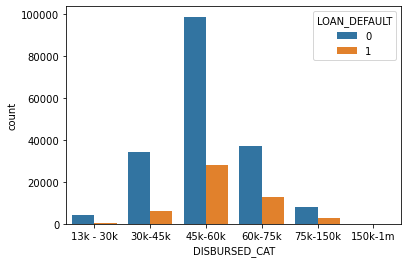

In [9]:
#viewing new column with binned values
print(loan_df.DISBURSED_CAT)
sns.countplot(x=loan_df.DISBURSED_CAT, hue='LOAN_DEFAULT', data=loan_df);

In [10]:
#with the certainty of the outlier disbursed amount value not being an error in our data, a disbursal difference column can be created.
loan_df['DISBURSAL_DIFF'] = loan_df.ASSET_COST - loan_df.DISBURSED_AMOUNT 

In [11]:
#viewing the new, asset cost and disbursed amount columns
#maybe loans with low disbursal differences have a higher rate of default
loan_df[['DISBURSAL_DIFF','ASSET_COST', 'DISBURSED_AMOUNT']].sample(5)

,DISBURSAL_DIFF,ASSET_COST,DISBURSED_AMOUNT
UNIQUEID,,,
451141,11430,60908,49478
589180,20877,93594,72717
638640,18954,76337,57383
603514,8065,65278,57213
634197,14156,72569,58413


In [12]:
#the vehicle loan data contains primary and secondary accounts that provide info about any exisiting loan a customer may have
#primary account - a loan where the customer is the sole recipient of the loan
#secondary account - a loan where the customer is a co-applicant or guarantor 
#combining the columns instead of dropping them should reduce any associated complexity they may add because they can contribute to detecting loan defaults

In [13]:
#creating new columns to contain combined primary and secondary accounts values
loan_df['TOTAL_ACCTS'] = loan_df.PRI_NO_OF_ACCTS + loan_df.SEC_NO_OF_ACCTS 

In [14]:
#viewing the new column
loan_df[['TOTAL_ACCTS', 'PRI_NO_OF_ACCTS', 'SEC_NO_OF_ACCTS']].sample(10)

,TOTAL_ACCTS,PRI_NO_OF_ACCTS,SEC_NO_OF_ACCTS
UNIQUEID,,,
564186,2,2,0
589387,2,1,1
543437,0,0,0
583828,1,1,0
587422,13,13,0
598670,0,0,0
529980,0,0,0
622321,4,4,0
504326,5,5,0


In [15]:
#creating more combined columns using the same logic
loan_df['TOTAL_ACTIVE_ACCTS'] = loan_df.PRI_ACTIVE_ACCTS + loan_df.SEC_ACTIVE_ACCTS
loan_df['TOTAL_OVERDUE_ACCTS'] = loan_df.PRI_OVERDUE_ACCTS + loan_df.SEC_OVERDUE_ACCTS
loan_df['TOTAL_CURRENT_BALANCE'] = loan_df.PRI_CURRENT_BALANCE + loan_df.SEC_CURRENT_BALANCE
loan_df['TOTAL_SANCTIONED_AMOUNT'] = loan_df.PRI_SANCTIONED_AMOUNT + loan_df.SEC_SANCTIONED_AMOUNT
loan_df['TOTAL_DISBURSED_AMOUNT'] = loan_df.PRI_DISBURSED_AMOUNT + loan_df.SEC_DISBURSED_AMOUNT
loan_df['TOTAL_INSTAL_AMT'] = loan_df.PRIMARY_INSTAL_AMT + loan_df.SEC_INSTAL_AMT

In [16]:
#dropping the previous individual primary and secondary accounts to avoid having duplicate data
drop_cols = ['PRI_NO_OF_ACCTS', 'PRI_ACTIVE_ACCTS', 'PRI_OVERDUE_ACCTS', 'PRI_CURRENT_BALANCE', 'PRI_SANCTIONED_AMOUNT', 'PRI_DISBURSED_AMOUNT', 'PRIMARY_INSTAL_AMT', 'SEC_NO_OF_ACCTS', 'SEC_ACTIVE_ACCTS', 'SEC_OVERDUE_ACCTS', 'SEC_CURRENT_BALANCE', 'SEC_SANCTIONED_AMOUNT', 'SEC_DISBURSED_AMOUNT', 'SEC_INSTAL_AMT']

loan_df = loan_df.drop(drop_cols, axis=1)

In [17]:
#creating a new column to store the percentage of overduce acts (expressed as a percentage of the total loan accounts)
loan_df['OVERDUE_PCT'] = loan_df.TOTAL_OVERDUE_ACCTS / loan_df.TOTAL_ACCTS

In [18]:
#inspecting the overdue pct column since some primary and secondary accounts had missing values
loan_df.OVERDUE_PCT.isnull().sum()

115792

In [19]:
#filling the null values with 0
loan_df.OVERDUE_PCT = loan_df.OVERDUE_PCT.fillna(0)

In [20]:
#inspecting for missing values again
loan_df.OVERDUE_PCT.isnull().sum()

0

Text(0.5, 1.0, 'prior to scaling')

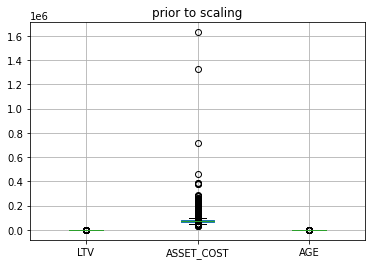

In [21]:
#viewing some continuous variable columns to inspect scale distribution
loan_df[['LTV', 'ASSET_COST', 'AGE']].boxplot();
plt.title('prior to scaling')

In [22]:
#using minmax scaler to normalize the distribution since all the numeric values are distributed across very different scales (beyond 0-1)
from sklearn.preprocessing import MinMaxScaler

#creating a MinMaxScaler object
mm_scaler = MinMaxScaler()

In [23]:
#creating a list of all numeric colums
numeric_cols = ['DISBURSED_AMOUNT', 
                'ASSET_COST', 
                'LTV', 
                'NEW_ACCTS_IN_LAST_SIX_MONTHS', 
                'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS', 
                'NO_OF_INQUIRIES', 
                'AGE', 
                'AVERAGE_ACCT_AGE_MONTHS', 
                'CREDIT_HISTORY_LENGTH_MONTHS',
                'PERFORM_CNS_SCORE',
                'TOTAL_ACCTS',
                'TOTAL_ACTIVE_ACCTS',
                'TOTAL_OVERDUE_ACCTS',
                'TOTAL_CURRENT_BALANCE', 
                'TOTAL_SANCTIONED_AMOUNT', 
                'TOTAL_DISBURSED_AMOUNT', 
                'TOTAL_INSTAL_AMT', 
                'OVERDUE_PCT', 
                'DISBURSAL_DIFF']

In [24]:
#calling the fit_transfrom method on the numeric cols to normalize the distribution
loan_df[numeric_cols] = mm_scaler.fit_transform(loan_df[numeric_cols])

Text(0.5, 1.0, 'after scaling')

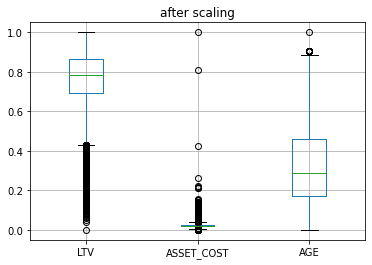

In [25]:
#inspecting the previous columns after scaling
loan_df[['LTV', 'ASSET_COST', 'AGE']].boxplot();
plt.title('after scaling')

In [29]:
loan_df.to_csv('C:\\Users\\Daniel-Panovest\\Downloads\\python ultra\\files\\data\\vehicle_loans_feat')